In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from math import log, exp
import pandas as pd
# import seaborn as sns

# Implementing MCMC in TensorFlow

### 1. A brief introduction to Markov Chain Monte Carlo
### 2. Implementing a Metropolos-Hastings algorithm in python
### 3. Naive TensorFlow implementation
### 4. Optimised TensorFlow implementation

## A brief introduction to Markov Chain Monte Carlo

## Implementing a Metropolos-Hastings algorithm in python

We start with the classic Metropolis-Hasting algorithm. Let $p(x)$ be the target probability distribution and $q(x)$ represent the proposal distribution. The algorithm can be summarised as follows.

1. start the walk from an initial position $x_0$
2. propose a new random psotion $x_1$ from $q(x)$ conditional on $x_0$, i.e., $x_1 \sim q(x_1|x_0)$
3. accept the new position with the proability $\alpha(x_0, x_1) = min\left[1, \frac{p(x_1)q(x_0|x_1)}{p(x_0)q(x_1|x_0)}\right]$
4. if accepted move the initial position to $x_1$ and return to step-1 other wise start from step-2 

Consider a bivariate Normal distribution given by
$$
p(\mathbf{x}) \propto \exp\left[-\frac{1}{2} (\mathbf{x - \mu})^T\Sigma^{-1}(\mathbf{x - \mu})\right]
$$
with 

$$
\mu = \mathbf{0}
$$
and
$$
\Sigma = \left[
    \begin{array}{cc}
    1 & 0 \\
    0 & 1
    \end{array}
\right]
$$

We can coode this in `python` as

In [2]:
def log_prob(x):
    mu = np.zeros(2)
    sigma = np.eye(2)
    return -0.5*np.inner((x-mu),np.dot(sigma, (x-mu)))

Now the Metropolis-Hastings algorithm

In [3]:
def metropolis_hastings(start_point, num_iterations, scale_factor=1.):
    samples = []
    # step-1 start the walk from a specified starting points
    x_0 = np.copy(start_point)
    for it in range(num_iterations):
        # step-2 propose a new point using the proposal distribution (in this case another bivariate Normal)
        x_1 = x_0 + scale_factor*np.random.multivariate_normal(mean=np.zeros(len(x_0)), cov=np.eye(len(x_0)))
        
        # step-3 compute the acceptance probability 
        log_ratio = log_prob(x_1) - log_prob(x_0)
        log_uni = log(np.random.uniform())
        
        # step-4 if accepted change the intial position to x_1
        if log_ratio > log_uni :
            x_0 = np.copy(x_1)
            samples.append(x_0)
    
    return np.asarray(samples)

In [4]:
samples = metropolis_hastings(start_point=np.random.normal(0,1,2), num_iterations=100, scale_factor=1.)

In [5]:
samples = pd.DataFrame(data=samples, index=np.arange(samples.shape[0]), columns=np.arange(samples.shape[1]))

In [6]:
# sns.kdeplot(samples[0], samples[1])

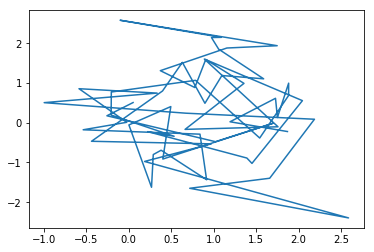

In [7]:
plt.plot(samples[0], samples[1])

In [8]:
y0 = np.linspace(-3,3,100)
y1 = np.linspace(-3,3,100)
Y0,Y1 = np.meshgrid(y0,y1)
probs = np.zeros(np.shape(Y0))

In [9]:
for i in range(Y0.shape[0]):
    for j in range(Y1.shape[1]):
        probs[i,j] = log_prob(np.asarray([Y0[i,j], Y1[i,j]]))

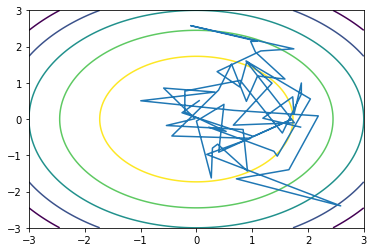

In [11]:
plt.contour(Y0,Y1,probs)
plt.plot(samples[0], samples[1])